# Uncovering Crime Trends in Chicago Through Data Analytics
A data analysis project exploring crime trends in Chicago from 2023 to the present. It uses visualizations and statistical techniques to uncover patterns by time, location, and crime type.

## 1.Load the data

In [37]:
import pandas as pd

# Load the complete dataset
file_path = "/Users/prasanthibaviseti/Downloads/Crimes_-_2001_to_2025.csv"
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter data from 2023 to the present (including 2025 so far) and create 'Month' column directly
df_recent = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= pd.Timestamp.today())].copy()

# Now it's safe to modify df_recent without warnings
df_recent['Month'] = df_recent['Date'].dt.strftime('%B')

# Display shape and a few initial rows
print(f"Filtered dataset shape: {df_recent.shape}")
df_recent.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Filtered dataset shape: (575320, 23)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month
1,13053066,JG103252,2023-01-03 16:44:00,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN,January
3,13203321,JG415333,2023-09-06 17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)",September
4,13204489,JG416325,2023-09-06 11:00:00,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,32.0,06,1176857.0,1896680.0,2023,11/04/2023 03:40:18 PM,41.871835,-87.626151,"(41.871834768, -87.62615082)",September
9,13003649,JG177593,2023-02-22 13:50:00,070XX S CLYDE AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - PORCH / HALLWAY,True,False,...,43.0,05,1191427.0,1858753.0,2023,01/19/2024 03:40:50 PM,41.767419,-87.573890,"(41.767419224, -87.573890196)",February
10,13061203,JG246126,2023-05-03 08:10:00,073XX S EMERALD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,True,...,68.0,08B,1172570.0,1856234.0,2023,01/19/2024 03:40:50 PM,41.760943,-87.643083,"(41.760942883, -87.643082808)",May


## 2. Cleaning the data

In [3]:
# Check for duplicate records
duplicates = df_recent.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df_recent = df_recent.drop_duplicates()

# Check for missing values
missing = df_recent.isnull().sum()
print("\nMissing values per column:\n", missing)
df_recent = df_recent.dropna()

# Check updated shape
print(f"\nData shape after cleaning: {df_recent.shape}")

# View unique values in each categorical column
categorical_cols = df_recent.select_dtypes(include=['object', 'bool']).columns

print("\nUnique values in categorical columns:\n")
for col in categorical_cols:
    print(f"{col}: {df_recent[col].nunique()} unique values")

Number of duplicate rows: 0

Missing values per column:
 ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    2623
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       3
Community Area             3
FBI Code                   0
X Coordinate            1854
Y Coordinate            1854
Year                       0
Updated On                 0
Latitude                1854
Longitude               1854
Location                1854
Month                      0
dtype: int64

Data shape after cleaning: (570929, 23)

Unique values in categorical columns:

Case Number: 570871 unique values
Block: 32835 unique values
IUCR: 352 unique values
Primary Type: 31 unique values
Description: 330 unique values
Location Description: 140 unique va

## 3. Basic Exploration

In [4]:
# Overview of the dataset
print("Dataset Info:\n")
df_recent.info()

# Summary statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n")
print(df_recent.describe())

# Descriptive statistics for categorical columns
print("\nDescriptive statistics for categorical columns:\n")
print(df_recent.describe(include=["object", "bool"]))

# Count of crimes by year
df_recent['Year'] = df_recent['Date'].dt.year
print("\nCrimes per year:\n", df_recent['Year'].value_counts().sort_index())

# Value counts for Primary Type (i.e., major crime categories)
print("\nTop 10 Crime Types:\n")
print(df_recent['Primary Type'].value_counts().head(10))

# Value counts for Location Description
print("\nTop 10 Crime Locations:\n")
print(df_recent['Location Description'].value_counts().head(10))

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 570929 entries, 3 to 8291641
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    570929 non-null  int64         
 1   Case Number           570929 non-null  object        
 2   Date                  570929 non-null  datetime64[ns]
 3   Block                 570929 non-null  object        
 4   IUCR                  570929 non-null  object        
 5   Primary Type          570929 non-null  object        
 6   Description           570929 non-null  object        
 7   Location Description  570929 non-null  object        
 8   Arrest                570929 non-null  bool          
 9   Domestic              570929 non-null  bool          
 10  Beat                  570929 non-null  int64         
 11  District              570929 non-null  float64       
 12  Ward                  570929 non-null  float64 

## 4. Visual Summary for Arrested and Non-Arrested 
Pie Chart – Arrests vs Non-Arrests

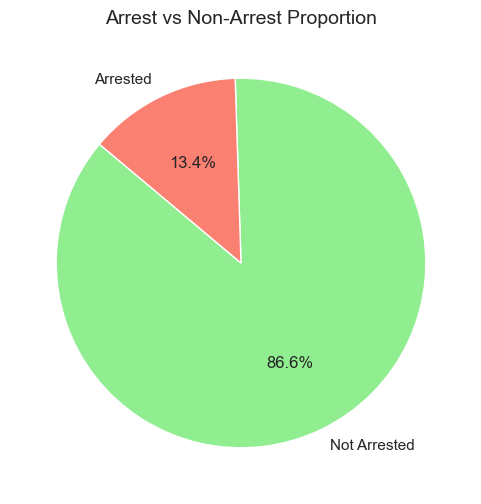

In [24]:
arrest_counts = df_recent['Arrest'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(arrest_counts, labels=arrest_counts.index.map({True: 'Arrested', False: 'Not Arrested'}), autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title("Arrest vs Non-Arrest Proportion", fontsize=14)
plt.show()

## 5. Univariate Analysis
1. Distribution of Crime Types

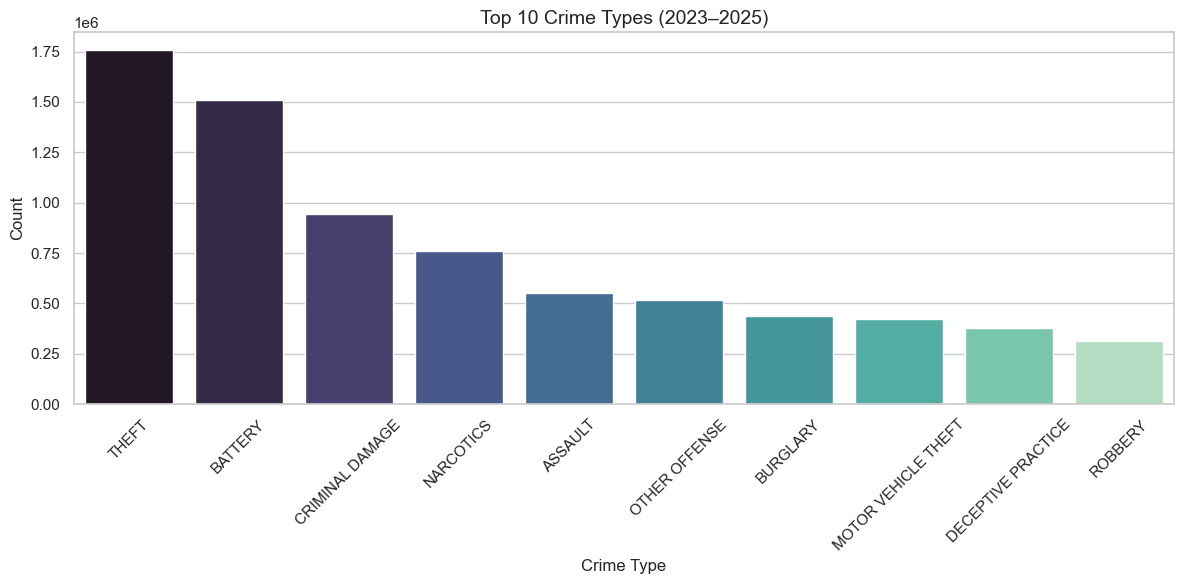

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Get the top 10 crime types
top_crimes = df['Primary Type'].value_counts().head(10)

# Create the bar plot and use `hue` for color differentiation
plt.figure(figsize=(12, 6))
sns.barplot(x=top_crimes.index, y=top_crimes.values, hue=top_crimes.index, palette="mako", legend=False)
plt.title("Top 10 Crime Types (2023–2025)", fontsize=14)
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





2. Distribution of Crime Locations

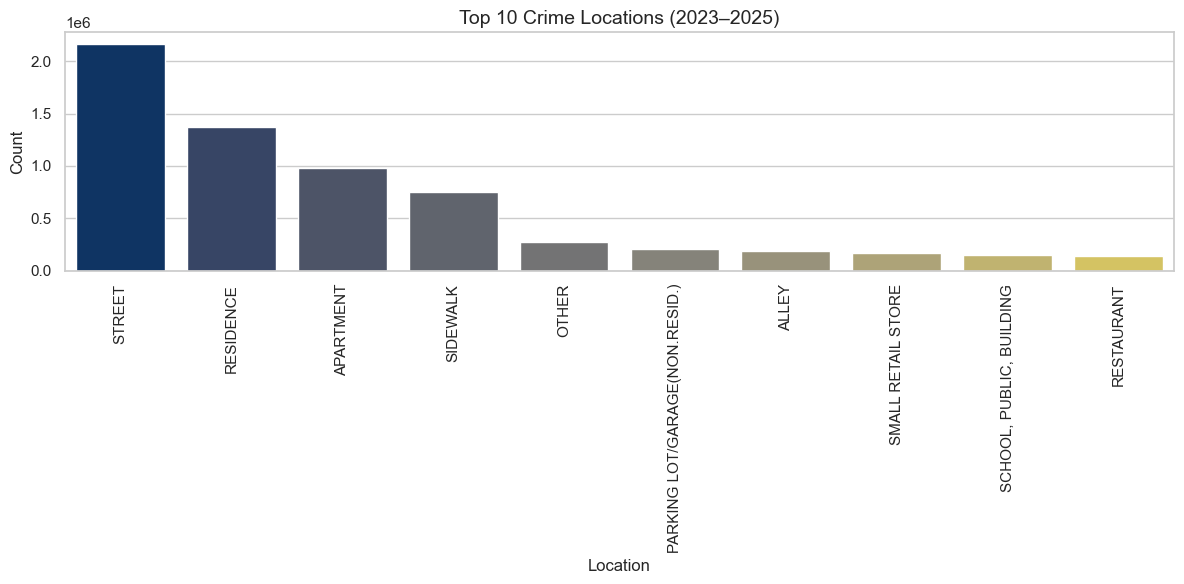

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Get the top 10 crime locations
top_locations = df['Location Description'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, hue=top_locations.index, palette="cividis", legend=False)
plt.title("Top 10 Crime Locations (2023–2025)", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


3. Distribution of Arrests

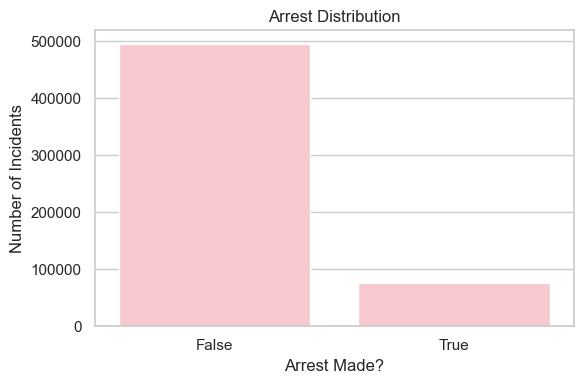

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_recent, x='Arrest',color='pink',legend=False)
plt.title("Arrest Distribution")
plt.xlabel("Arrest Made?")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()

## 6. Bivariate & Comparative Analysis (for 2023–2025 Crime Data)
1. Compare Crime Types by Year

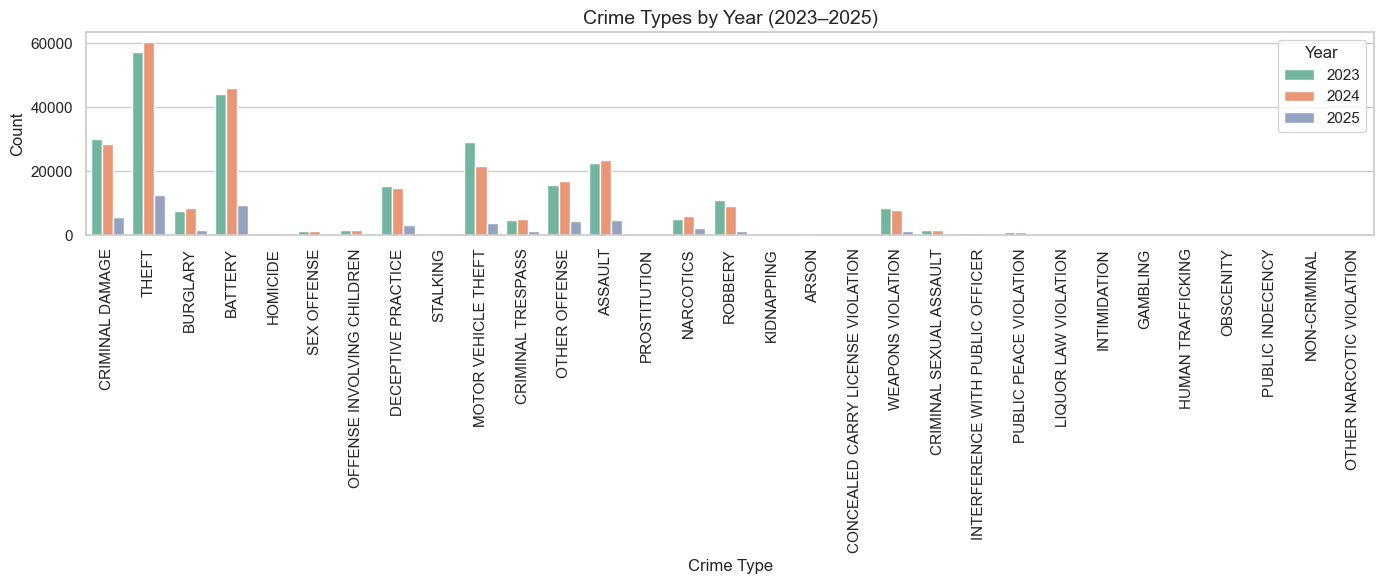

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df_recent['Year'] = df_recent['Date'].dt.year

plt.figure(figsize=(14, 6))
sns.countplot(data=df_recent, x='Primary Type', hue='Year', palette='Set2')
plt.xticks(rotation=90)
plt.title("Crime Types by Year (2023–2025)", fontsize=14)
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.legend(title='Year')
plt.tight_layout()
plt.show()

The above plot shows the distribution of different crime types in Chicago for the years 2023 to 2025, with a comparison of how each crime type has fluctuated over time. The color coding by year allows for a clear visualization of trends and shifts in crime patterns across the three years.

2. Compare Arrest Rates by Crime Type

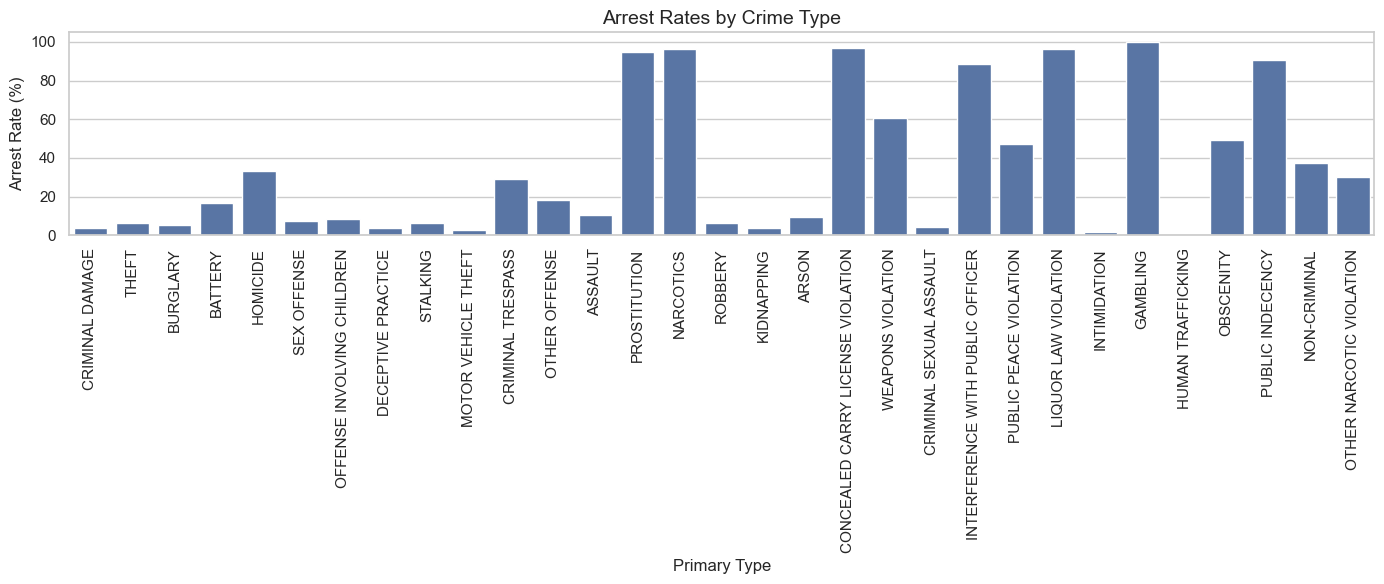

In [18]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_recent, x='Primary Type', y='Arrest', estimator=lambda x: x.mean()*100, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Arrest Rate (%)")
plt.title("Arrest Rates by Crime Type", fontsize=14)
plt.tight_layout()
plt.show()

This plot shows the arrest rates for each crime type, allowing you to compare how frequently arrests are made for different crimes. The higher the value on the y-axis, the more likely an arrest is made for that crime type. This comparison can highlight trends and identify which types of crimes are more likely to lead to an arrest.

## 7. Time Series / Trend Analysis
 Heatmap: Crimes by Day of Week and Hour

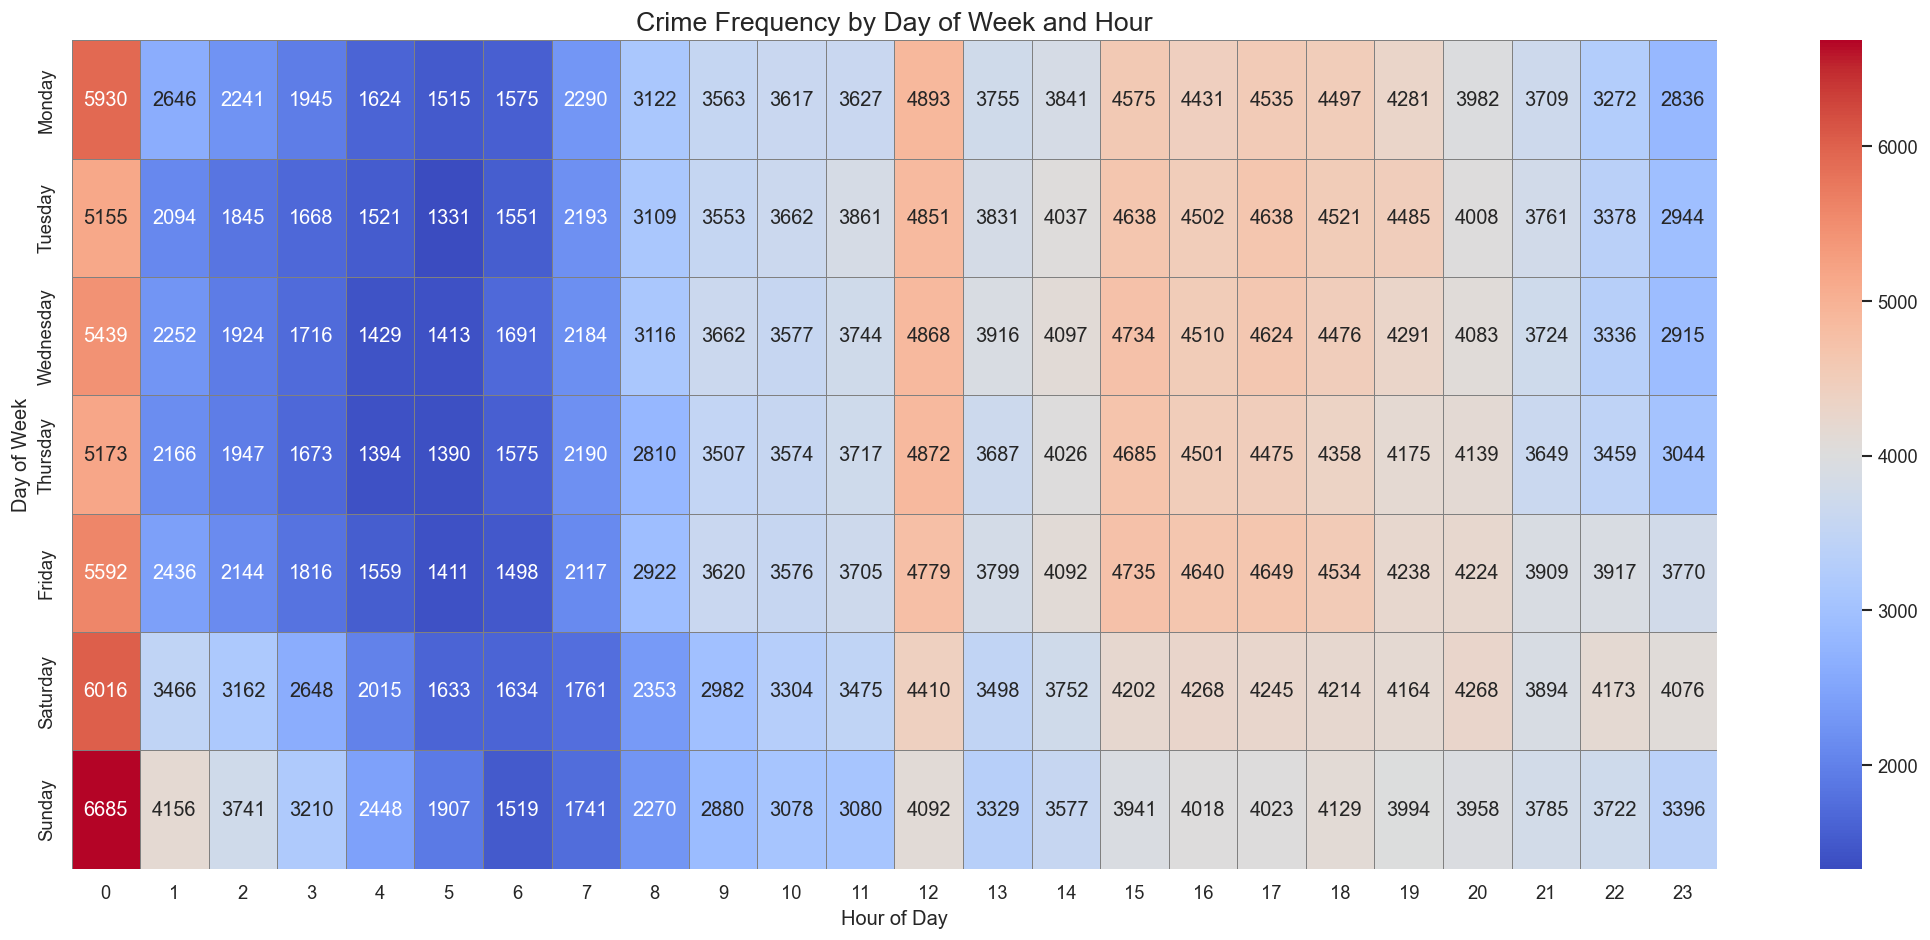

In [36]:
df_recent['Hour'] = df_recent['Date'].dt.hour
df_recent['DayOfWeek'] = pd.Categorical(df_recent['Date'].dt.day_name(), 
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                        ordered=True)

heatmap_data = df_recent.groupby(['DayOfWeek', 'Hour'], observed=True).size().unstack().fillna(0)


# Create a larger and clearer heatmap
plt.figure(figsize=(18, 8), dpi=120)
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=.5, linecolor='gray', annot=True, fmt='.0f')
plt.title("Crime Frequency by Day of Week and Hour", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)
plt.tight_layout()
plt.show()

“The heatmap reveals a clear concentration of crimes during evening hours (6 PM – 11 PM), particularly on weekends, suggesting a strong correlation between nightlife and increased criminal activity. This pattern can help law enforcement allocate resources more efficiently during high-risk times.”


## 8. Crime Hotspots in Chicago (2023–2025)

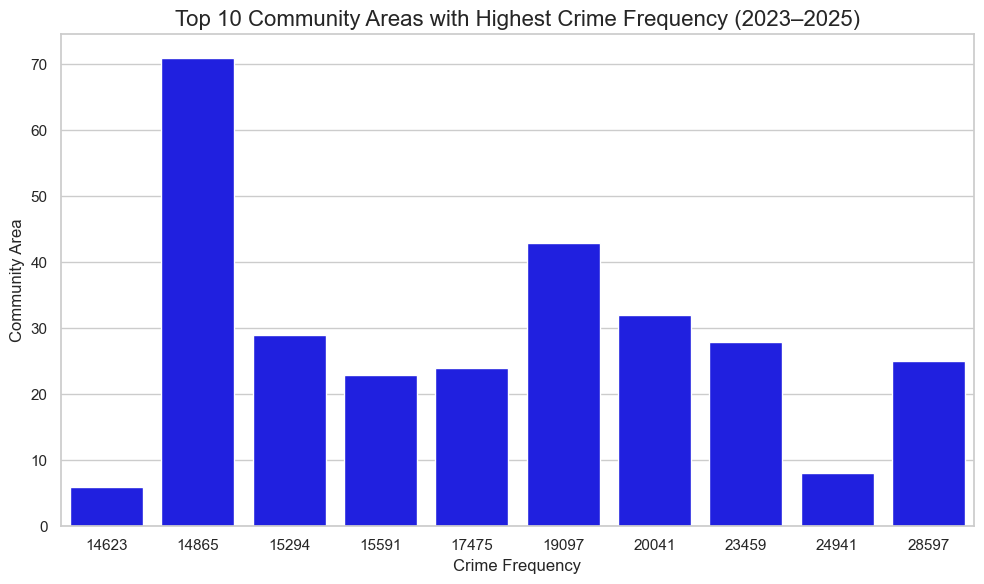

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter the data from 2023 to present
df_recent = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= pd.Timestamp.today())].copy()

# Check if necessary columns exist
if 'District' in df_recent.columns and 'Community Area' in df_recent.columns:
    # Group by 'District' and 'Community Area' to find crime frequency
    district_crimes = df_recent['District'].value_counts().head(10)  # Top 10 districts with highest crime counts
    community_crimes = df_recent['Community Area'].value_counts().head(10)  # Top 10 community areas with highest crime counts

    
    # Plot top community areas by crime frequency
    plt.figure(figsize=(10, 6))
    sns.barplot(x=community_crimes.values, y=community_crimes.index, color='blue')
    plt.title("Top 10 Community Areas with Highest Crime Frequency (2023–2025)", fontsize=16)
    plt.xlabel("Crime Frequency")
    plt.ylabel("Community Area")
    plt.tight_layout()
    plt.show()

## Top Districts Plot:
This reveals which districts are experiencing the highest volume of crime, potentially highlighting areas that may need increased policing or community intervention.
## Top Community Areas Plot: 
This shows the specific neighborhoods or areas within the city that are seeing the most criminal activity. These insights can guide urban planning efforts, resource allocation, and crime prevention strategies.

## 9. Chi-Square Test: Crime Type vs Arrest Likelihood

In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table between 'Primary Type' (Crime Type) and 'Arrest' (Arrested vs Non-Arrested)
contingency_table = pd.crosstab(df_recent['Primary Type'], df_recent['Arrest'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

# Conclusion
if p < 0.05:
    print("\nThere is a significant relationship between crime type and whether an arrest was made (reject H0).")
else:
    print("\nThere is no significant relationship between crime type and whether an arrest was made (fail to reject H0).")


Chi-Square Statistic: 161905.00992537447
P-Value: 0.0
Degrees of Freedom: 30

There is a significant relationship between crime type and whether an arrest was made (reject H0).


From the Chi-Square Test between Arrest and Crime Type, we sought to determine if certain crime types are more likely to result in an arrest.

-> If the p-value is less than 0.05, we conclude that there is a significant relationship between the crime type and whether an arrest was made. 

-> If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that there is no significant relationship between the crime type and whether an arrest occurred. 